In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import fwht, ifwht
from scipy.linalg import hadamard, inv
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
data_batch_1 = unpickle("/Users/advaitshukla/Downloads/cifar-10-batches-py/data_batch_1")
data_batch_2 = unpickle("/Users/advaitshukla/Downloads/cifar-10-batches-py/data_batch_2")
data_batch_3 = unpickle("/Users/advaitshukla/Downloads/cifar-10-batches-py/data_batch_3")
data_batch_4 = unpickle("/Users/advaitshukla/Downloads/cifar-10-batches-py/data_batch_4")
data_batch_5 = unpickle("/Users/advaitshukla/Downloads/cifar-10-batches-py/data_batch_5")
test_batch   = unpickle("/Users/advaitshukla/Downloads/cifar-10-batches-py/test_batch")

In [3]:
batch1_imgs      = np.array(data_batch_1[b'data'], dtype=int)
batch1_labels    = np.array(data_batch_1[b'labels'], dtype=int)
batch2_imgs      = np.array(data_batch_2[b'data'], dtype=int)
batch2_labels    = np.array(data_batch_2[b'labels'], dtype=int)
batch3_imgs      = np.array(data_batch_3[b'data'], dtype=int)
batch3_labels    = np.array(data_batch_3[b'labels'], dtype=int)
batch4_imgs      = np.array(data_batch_4[b'data'], dtype=int)
batch4_labels    = np.array(data_batch_4[b'labels'], dtype=int)
batch5_imgs      = np.array(data_batch_5[b'data'], dtype=int)
batch5_labels    = np.array(data_batch_5[b'labels'], dtype=int)
testbatch_imgs   = np.array(test_batch[b'data'], dtype=int)
testbatch_labels = np.array(test_batch[b'labels'], dtype=int)

In [4]:
all_imgs   = np.concatenate((batch1_imgs,batch2_imgs,batch3_imgs,batch4_imgs,batch5_imgs,testbatch_imgs), dtype=int)
all_labels = np.concatenate((batch1_labels,batch2_labels,batch3_labels,batch4_labels,batch5_labels,testbatch_labels))

In [5]:
all_imgs_rgb = all_imgs.reshape(len(all_imgs),3,32,32).transpose(0,2,3,1)
print(all_imgs.shape, all_imgs_rgb.shape)

(60000, 3072) (60000, 32, 32, 3)


In [7]:
all_imgs[0] * hadamard(32)

ValueError: operands could not be broadcast together with shapes (3072,) (32,32) 

In [13]:
h = np.array(hadamard(32),dtype=int)
k = np.empty((32,32,3), dtype=int)
print(h.shape,k.shape)
for i in range(h.shape[0]):
    for j in range(h.shape[1]):
        k[i][j] = (np.multiply(h[i][j] , [1,1,1]))
h
k

(32, 32) (32, 32, 3)


array([[[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 1,  1,  1],
        [-1, -1, -1],
        [ 1,  1,  1],
        ...,
        [-1, -1, -1],
        [ 1,  1,  1],
        [-1, -1, -1]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [-1, -1, -1],
        ...,
        [ 1,  1,  1],
        [-1, -1, -1],
        [-1, -1, -1]],

       ...,

       [[ 1,  1,  1],
        [-1, -1, -1],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [-1, -1, -1],
        [ 1,  1,  1]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [-1, -1, -1],
        ...,
        [-1, -1, -1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 1,  1,  1],
        [-1, -1, -1],
        [-1, -1, -1],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [-1, -1, -1]]])

In [14]:
h = np.array(hadamard(32), dtype=int)
g = np.empty((32,32,3), dtype=int)
for i in range(h.shape[0]):
    for j in range(h.shape[1]):
        g[i][j] = np.array(h[i][j], dtype=int) * np.array([1,1,1], dtype=int)

g.shape



(32, 32, 3)

In [28]:
h_transformed = np.empty(all_imgs_rgb.shape,dtype=int)
i=0
for img in all_imgs_rgb:
    h_transformed[i] = fwht(img)
    i+=1
h_transformed.shape


(60000, 32, 32, 3)

In [25]:
s = all_imgs_rgb[9] * k
s.shape

(32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3) (32, 32, 3)


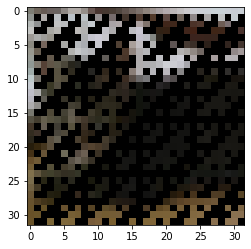

In [26]:
print(k.shape,g.shape)
plt.imshow(s)

NameError: name 'h_transformed' is not defined

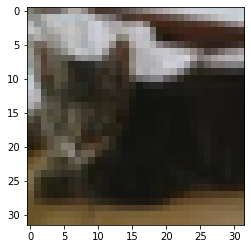

In [27]:
plt.imshow(all_imgs_rgb[9])
plt.imshow(h_transformed[9])

In [22]:
i = inv(h)

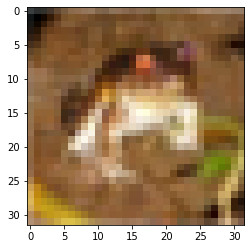

In [24]:
l = s * g
plt.imshow(l)

In [38]:
h_transformed.shape

(60000, 32, 32, 3)

In [35]:
arr = []
c = 0
for i in range(32):
    for j in range(96):
        if j<96-c:
            arr.append(1)
        else:
            arr.append(0)
    if i%3==0:
        c=c+3
arr = np.array(arr)
arr = arr.reshape(32,32,3)
arr.shape

(32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


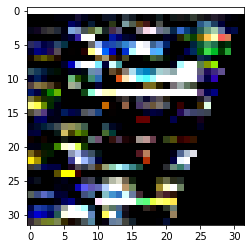

In [37]:
half_coeff = np.multiply(h_transformed[0],arr)
plt.imshow(half_coeff)

In [46]:
reduced_h_img = np.empty(h_transformed.shape, dtype=int)
p=0
for i in h_transformed:
    reduced_h_img[p] = np.multiply(i,arr)
    p=p+1
reduced_h_img

array([[[[4336, 3354, 2234],
         [4086, 2814, 1309],
         [4235, 3006, 1476],
         ...,
         [4386, 3432, 1751],
         [3998, 2997, 1522],
         [3806, 2905, 1658]],

        [[ -46,  -36,  -24],
         [ -58,  -42,  -37],
         [ -67,  -50,  -40],
         ...,
         [  -4,   -4,   15],
         [  -8,   -5,    6],
         [   0,    0,    0]],

        [[-100,  -56,  -42],
         [-144,  -94,  -57],
         [-137,  -86,  -14],
         ...,
         [ -74,  -62,   -9],
         [-148, -131,  -66],
         [   0,    0,    0]],

        ...,

        [[   0,    6,   70],
         [  34,   64,  169],
         [  21,   52,  154],
         ...,
         [   0,    0,    0],
         [   0,    0,    0],
         [   0,    0,    0]],

        [[ -42,  -34,  132],
         [-120,  -52,  209],
         [-149,  -68,  168],
         ...,
         [   0,    0,    0],
         [   0,    0,    0],
         [   0,    0,    0]],

        [[  56,   44,   54],
       

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


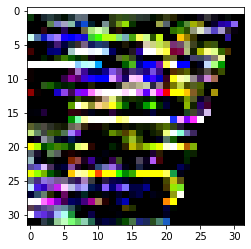

In [49]:
plt.imshow(reduced_h_img[6])

In [53]:
inv_h_transformed = np.empty(reduced_h_img.shape,dtype=int)
q=0
for img in reduced_h_img:
    inv_h_transformed[q] = ifwht(img)
    q+=1
inv_h_transformed.shape


(60000, 32, 32, 3)

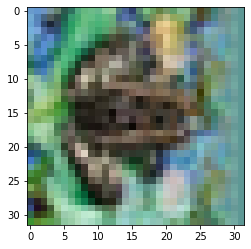

In [55]:
plt.imshow(inv_h_transformed[200])

In [60]:
data = {}
data['transformed-images'] = inv_h_transformed
data['labels'] = all_labels

In [69]:
f = open('transformed-data.txt',"w")
f.write(str(data))
f.close()

In [74]:
import pickle
f = open('data-transformed.pkl','wb')
pickle.dump(data,f)
f.close()

In [4]:
import pickle
with open('data-transformed.pkl', 'rb') as fo:
    dict = pickle.load(fo)
print(type(dict))



<class 'dict'>
